In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gauss_2d(x,y,mux,muy, sigmax, sigmay):
    return 67000*np.exp(-( (x-mux)**2 / ( 2.0 * sigmax**2 ) )-( (y-muy)**2 / ( 2.0 * sigmay**2 ) ) )

In [4]:
def make_beam_image(xmin, xmax, ymin, ymax, Nx=400, Ny=400, Nsegx=8, Nsegy=2, 
                    mux=200, muy=200, sigmax=800, sigmay=800, 
                    gain_calib=0.01):
    x, y = np.meshgrid(np.linspace(xmin,xmax,Nx), np.linspace(ymin,ymax,Ny))
    mux = (xmax-xmin)/2.
    muy = (ymax-ymin)/2.
    orig = np.array(gauss_2d(x,y,mux,muy,sigmax,sigmay))
    tmp = np.array(np.split(orig,Nsegx, axis=1))
#    tmp2 = [np.array(np.split(tmp[i],Nsegy, axis=0)) for i in np.arange(Nsegx)]
    r = np.random.uniform(-0.01,0.01,Nsegx)
#    r = np.random.uniform(-0.01,0.01,size=(Nsegx, Nsegy))
    tmp3 = np.concatenate(np.array([tmp[i]*(1+r[i]) for i in np.arange(Nsegx)]), axis=1)
    image = np.random.poisson(tmp3, size=(400,400)) # add Poisson noise

    return orig,r,image

In [5]:
xmin = 0
xmax = 400
ymin = 0
ymax = 400
orig, r, image= make_beam_image(xmin,xmax,ymin,ymax)

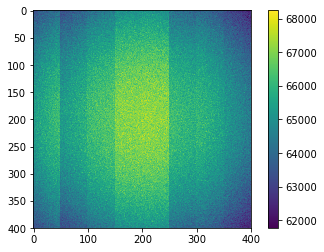

In [13]:
%matplotlib inline
plt.imshow(image)
plt.colorbar()

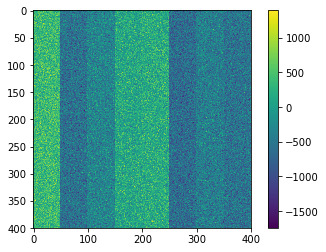

In [14]:
plt.imshow(image-orig)
plt.colorbar()

In [15]:
image_dict = {}
for i in np.arange(189):
    orig, r, image = make_beam_image(0,400,0,400)
    tot = image if i==0 else tot+image
    image_dict[i] = image

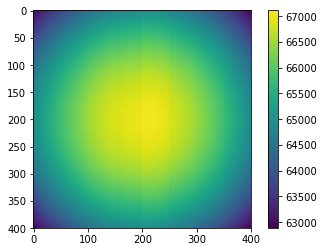

In [16]:
mean = tot/189.
plt.imshow(mean)
plt.colorbar()

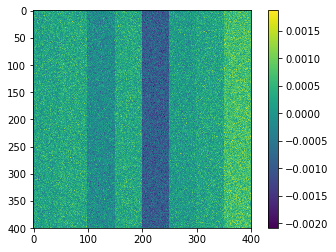

In [19]:
plt.imshow((orig-mean)/orig)
plt.colorbar()

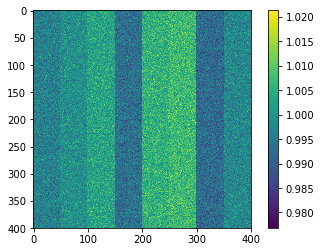

In [20]:
plt.imshow(image_dict[0]/mean)
plt.colorbar()

In [21]:
xarr = range(0,400,79)
yarr = range(0,400,79)

In [22]:
print xarr
node_val = [[mean[x][y] for y in yarr ] for x in xarr]
node_val
np.shape(node_val)

[0, 79, 158, 237, 316, 395]


(6, 6)

In [23]:
from scipy import interpolate
f = interpolate.interp2d(xarr, yarr, node_val, kind='cubic')

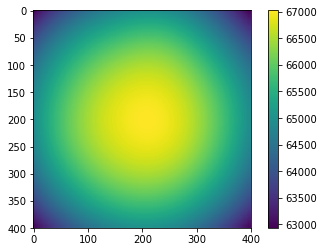

In [24]:
xarr2 = range(0,400,1)
yarr2 = range(0, 400,1)
plt.imshow(f(xarr2, yarr2))
plt.colorbar()

In [312]:
corr_fact = {}
for i in np.arange(189):
    corr_fact[i] = image_dict[i]/f(xarr2, yarr2)

In [313]:
image_dict2 = {}
for i in np.arange(189):
    tot = image_dict[i]/corr_fact[i] if i==0 else tot+image_dict[i]/corr_fact[i]
    image_dict2[i] = image_dict[i]/corr_fact[i]

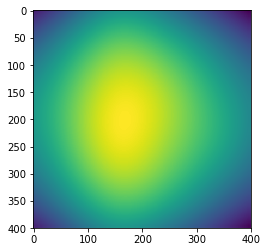

In [314]:
plt.imshow(image_dict2[7])